# Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### #1.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/US_macro_Quarterly.csv')
df.set_index(df.columns[0], inplace=True)
df.index.name = 'date'
df.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### #2.

In [3]:
df.index = pd.to_datetime(df.index).to_period('Q')
df.head()

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
date,,,,,,,,,,,,
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### #3.

In [4]:
df = df[['cpi']]
df.head()

,cpi
date,
1959Q1,28.98
1959Q2,29.15
1959Q3,29.35
1959Q4,29.37
1960Q1,29.54


### #4.

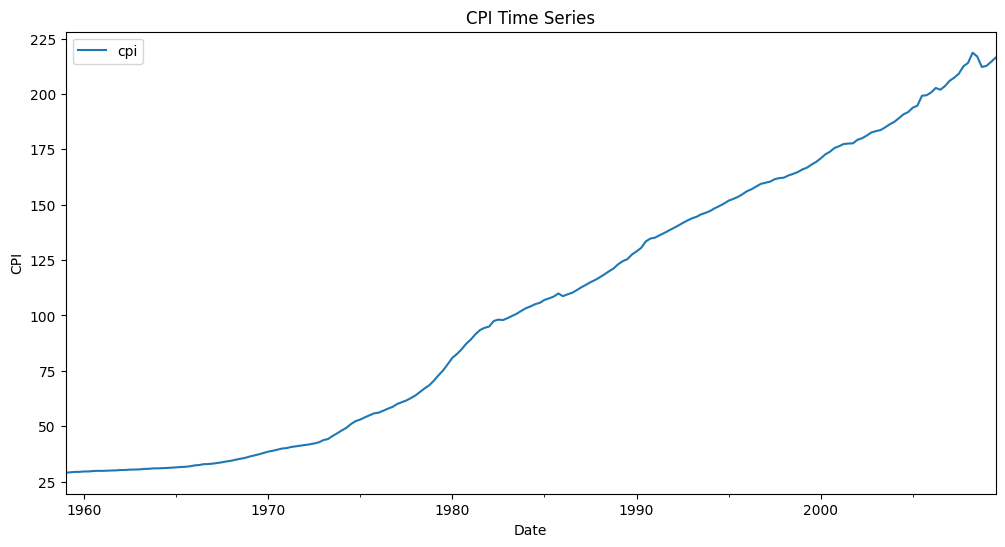

In [5]:
df.plot(figsize=(12,6))
plt.title('CPI Time Series')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

#4. There appears to be a solid trend, but no noticeable seasonality, So I would guess a Holtz-linear model would do nicely

In [6]:
from pycaret.time_series import *

### #5.

In [7]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='cpi' ,  fh = 24, coverage=0.90)

,Description,Value
0,session_id,1689
1,Target,cpi
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(203, 1)"
5,Transformed data shape,"(203, 1)"
6,Transformed train set shape,"(179, 1)"
7,Transformed test set shape,"(24, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


#5. We have 179 in-sample observations, and 24 hold out observations

### #6.

In [8]:
exp.plot_model(plot='train_test_split')

In [9]:
exp.plot_model(plot = 'decomp')

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

def ts_metrics(y, y_hat):
    """
    Calculate and display time series evaluation metrics.
    
    Parameters:
    y (array-like): Actual values
    y_hat (array-like): Predicted values
    
    Returns:
    dict: A dictionary containing all calculated metrics
    """
    # Calculate metrics
    mae = mean_absolute_error(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    r2 = r2_score(y, y_hat)
    
    
    # Store metrics in a dictionary
    metrics = {
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
    }
    
    # Print metrics with descriptions
    print("Time Series Model Evaluation Metrics:")
    print("-" * 40)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return 

### #7.

In [20]:
ses = exp.create_model('exp_smooth', trend=None, seasonal=None, sp= None, cross_validation=False)
y_pred = ses.predict(df.index[:-24])
ts_metrics(df['cpi'][:-24], y_pred)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564


Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 0.8870
Mean Absolute Percentage Error (MAPE): 1.0426%
Root Mean Squared Error (RMSE): 1.0888
R-squared (R²): 0.9996


In [21]:
ht = exp.create_model('exp_smooth', trend='add', seasonal=None, cross_validation=False)
y_pred = ht.predict(df.index[:-24])
ts_metrics(df['cpi'][:-24], y_pred)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.6604,2.5729,7.0187,8.0947,0.0337,0.0344,0.3378


Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 0.2948
Mean Absolute Percentage Error (MAPE): 0.3433%
Root Mean Squared Error (RMSE): 0.4448
R-squared (R²): 0.9999


In [22]:
hw = exp.create_model('exp_smooth', trend='add', seasonal='mul', sp=12, cross_validation=False)
y_pred = hw.predict(df.index[:-24])
ts_metrics(df['cpi'][:-24], y_pred)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.8408,2.7253,7.4945,8.5742,0.0360,0.0368,0.2571


Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 0.2893
Mean Absolute Percentage Error (MAPE): 0.3445%
Root Mean Squared Error (RMSE): 0.4244
R-squared (R²): 0.9999


#8. The Woltz-Winter had the hightst in-sample R-squared (tied with holtz-linear, but had better MAE and RMSE). The holtz-linear had the highest R-squared of the hold out set

### #9.

In [23]:
exp.plot_model([ses, ht, hw], plot='insample', data_kwargs={'labels':["SES", "Holtz-Linear", "Holtz-Winter"]})

### #10.

In [24]:
exp.plot_model([ses, ht, hw], plot='forecast', data_kwargs={'labels':["SES", "Holtz-Linear", "Holtz-Winter"], 'fh':36})

### #11.

In [25]:
naive = exp.create_model('naive', cross_validation=False)
exp.compare_models(include=[naive, ht, ses, hw], cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
1,Exponential Smoothing,2.6604,2.5729,7.0187,8.0947,0.0337,0.0344,0.3378,0.0100
3,Exponential Smoothing,2.8408,2.7253,7.4945,8.5742,0.0360,0.0368,0.2571,0.0400
0,Naive Forecaster,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564,0.0000
2,Exponential Smoothing,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564,0.0000


ExponentialSmoothing(sp=3, trend='add')

#11. The best model (Holtz-Linear) is able to outperform the naive predictor, which is the same as the SES model

# Question 2

### #1.

In [26]:
ets_ANN = exp.create_model('ets', error="add", trend=None, seasonal=None ,cross_validation=False )

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,7.0102,6.6746,18.4941,20.9996,0.0887,0.0940,-3.4565


#1.1 MAPE is the average percentage error between the predicted values and actual values.
The MAPE of this model is 0.0887

In [27]:
ets_AAN = exp.create_model('ets', error="add", trend="add", seasonal=None ,cross_validation=False )

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.6605,2.5729,7.0188,8.0948,0.0337,0.0344,0.3378


#1.2 RMSE represents the root mean squared error, measuring the average magnitude of errors in units of the original data.
The RMSE of this model is 8.0948

In [28]:
ets_AAA = exp.create_model('ets', error="add", trend="add", seasonal="add" ,cross_validation=False )

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.6999,2.6074,7.1227,8.2034,0.0342,0.0350,0.3199


#1.3 SMAPE (Symmetric Mean Absolute Percentage Error) is an accuracy measure like MAPE but adjusted to prevent overly penalizing large errors when actual values are small.
The SMAPE of this model is 0.0350

### #2.

In [29]:
exp.compare_models(include=[naive, ets_ANN, ets_AAN, ets_AAA], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
2,ETS,2.6605,2.5729,7.0188,8.0948,0.0337,0.0344,0.3378,0.0100
3,ETS,2.6999,2.6074,7.1227,8.2034,0.0342,0.0350,0.3199,0.0100
0,Naive Forecaster,7.0101,6.6746,18.4940,20.9995,0.0887,0.0940,-3.4564,0.0000
1,ETS,7.0102,6.6746,18.4941,20.9996,0.0887,0.0940,-3.4565,0.0100


AutoETS(sp=3, trend='add')

#2. The winner is the ETS(A,A,N)

### #3.

In [30]:
exp.plot_model([naive, ets_ANN, ets_AAN, ets_AAA], plot='forecast', data_kwargs={'labels':["Naive", "ETS(A,N,N)", "ETS(A,A,N)", "ETS(A,A,A)"], 'fh':36})

#3. The AAN and AAA models are almost overlapping, and the ANN and Naive models ARE overlapping. This is because there isn't much trend (for the first two), and the ANN and Naive models are actually the same

### #4.

In [44]:
holdout_pred = exp.predict_model(ets_AAN)
holdout_pred.loc['2009Q3']

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,2.6605,2.5729,7.0188,8.0948,0.0337,0.0344,0.3378


y_pred    206.9561
Name: 2009Q3, dtype: float64

#4. The prediction for 2009Q3 is 206.9561

### #5.

In [52]:
final_model = exp.finalize_model(ets_AAN)
exp.save_model(final_model, 'final_ETS')
exp.plot_model(final_model, plot='forecast', data_kwargs={'fh':60})

Transformation Pipeline and Model Successfully Saved


In [53]:
unseen_predictions = exp.predict_model(final_model, fh=60)
unseen_predictions.loc['2023Q1']

y_pred    268.9509
Name: 2023Q1, dtype: float64

#5. The prediction for 2023Q1 is 268.9509